In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import json
import torch
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from torchmetrics.text import Perplexity
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
nltk.download("universal_tagset")
nltk.download('averaged_perceptron_tagger')

from collections import Counter
from icr.generationevaluator import GenerationEvaluator
from icr.config import config
from icr.constants import PAD
from icr.vocabulary import Vocabulary
from icr.datamodel import CoDrawDataModule

[nltk_data] Downloading package universal_tagset to
[nltk_data]     /home/users/jspiess/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/users/jspiess/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/users/jspiess/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
vocab = Vocabulary(config["data"]["codraw_path"])

100%|██████████| 9993/9993 [00:00<00:00, 135721.16it/s]


Vocabulary was successfully built!
Vocabulary size is 2964


In [5]:
import os
os.environ['TOKENIZERS_PARALLELISM'] = 'false'

In [6]:
target_tokens = torch.load('./outputs/target_tokens.pt')

In [6]:
file_path = 'outputs/Transformer+classifiers_out_predictions.txt'

with open(file_path, 'r') as file:
    loaded_all_lists = json.load(file)

predictions_distribution = torch.tensor(loaded_all_lists).squeeze(1)

In [7]:
perp = Perplexity(ignore_index=vocab.stoi[PAD])

s = "perplexity"
score_p = perp(predictions_distribution, target_tokens).item()

In [8]:
with open("./outputs/Transformer+classifiers_icr_predictions.txt") as file:
    predictions = [line.strip() for line in file.readlines()]
    
with open("./outputs/targets.txt") as file:
    targets = [line.strip() for line in file.readlines()]
    
evaluator = GenerationEvaluator()
scores = evaluator.evaluate(predictions, targets)

print ("{:<20} {:<15}".format('Metric','Score'))
print("----------------------------")
for k, v in scores.items():
    score = v
    print ("{:<20} {:<15}".format(k, score))

print ("{:<20} {:<15}".format(s, round(score_p,1)))

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Metric               Score          
----------------------------
BERT Score           0.1955         
ChrF Score           0.1096         
BLEU Score1          0.146          
BLEU Score2          0.0308         
BLEU Score3          0.0051         
BLEU Score4          0.0            
ROUGE Score F1       0.1523         
CIDEr Score          0.14           
METEOR Score         0.125          
Distinct-1 Score     0.9574         
Distinct-2 Score     0.7458         
perplexity           1529.3         


In [113]:
with open("./outputs/targets.txt") as file:
    targets = [line.strip() for line in file.readlines()]

with open("./outputs/Baseline2.txt") as file:
    b = [line.strip() for line in file.readlines()]

with open("./outputs/Transformer+classifiers_icr_predictions.txt") as file:
    preds_t = [line.strip() for line in file.readlines()]

with open("./outputs/pretrainedClassifiers_icr_predictions.txt") as file:
    preds_pt = [line.strip() for line in file.readlines()]
    
with open("./outputs/Transformer_belowBase_icr_predictions.txt") as file:
    preds_tnoc = [line.strip() for line in file.readlines()]
    
with open("./outputs/Transformer+Classifiers_nohierarchy_icr_predictions.txt") as file:
    preds_tnoh = [line.strip() for line in file.readlines()]
    
    
evaluator = GenerationEvaluator()
scores = evaluator.evaluate(b, targets)

print ("{:<20} {:<15}".format('Metric','Score'))
print("----------------------------")
for k, v in scores.items():
    score = v
    print ("{:<20} {:<15}".format(k, score))

scores_t = evaluator.evaluate(preds_t, targets)

print ("{:<20} {:<15}".format('Metric','Score'))
print("----------------------------")
for k, v in scores_t.items():
    score = v
    print ("{:<20} {:<15}".format(k, score))
    
scores_pt = evaluator.evaluate(preds_pt, targets)

print ("{:<20} {:<15}".format('Metric','Score'))
print("----------------------------")
for k, v in scores_pt.items():
    score = v
    print ("{:<20} {:<15}".format(k, score))

scores_tnoc = evaluator.evaluate(preds_tnoc, targets)

print ("{:<20} {:<15}".format('Metric','Score'))
print("----------------------------")
for k, v in scores_tnoc.items():
    score = v
    print ("{:<20} {:<15}".format(k, score))

scores_tnoh = evaluator.evaluate(preds_tnoh, targets)

print ("{:<20} {:<15}".format('Metric','Score'))
print("----------------------------")
for k, v in scores_tnoh.items():
    score = v
    print ("{:<20} {:<15}".format(k, score))


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Metric               Score          
----------------------------
BERT Score           0.1471         
ChrF Score           0.1239         
BLEU Score1          0.1067         
BLEU Score2          0.0029         
BLEU Score3          0.0            
BLEU Score4          0.0            
ROUGE Score F1       0.1076         
CIDEr Score          0.0647         
METEOR Score         0.0844         
Distinct-1 Score     0.9202         
Distinct-2 Score     0.8301         


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Metric               Score          
----------------------------
BERT Score           0.1955         
ChrF Score           0.1096         
BLEU Score1          0.146          
BLEU Score2          0.0308         
BLEU Score3          0.0051         
BLEU Score4          0.0            
ROUGE Score F1       0.1523         
CIDEr Score          0.14           
METEOR Score         0.125          
Distinct-1 Score     0.9574         
Distinct-2 Score     0.7458         


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Metric               Score          
----------------------------
BERT Score           0.1534         
ChrF Score           0.1312         
BLEU Score1          0.1181         
BLEU Score2          0.0243         
BLEU Score3          0.0044         
BLEU Score4          0.0            
ROUGE Score F1       0.1178         
CIDEr Score          0.12           
METEOR Score         0.1131         
Distinct-1 Score     0.8916         
Distinct-2 Score     0.7354         


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Metric               Score          
----------------------------
BERT Score           0.1305         
ChrF Score           0.1093         
BLEU Score1          0.1055         
BLEU Score2          0.0194         
BLEU Score3          0.0023         
BLEU Score4          0.0            
ROUGE Score F1       0.121          
CIDEr Score          0.1262         
METEOR Score         0.0931         
Distinct-1 Score     0.966          
Distinct-2 Score     0.7063         


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Metric               Score          
----------------------------
BERT Score           0.101          
ChrF Score           0.1024         
BLEU Score1          0.0872         
BLEU Score2          0.0167         
BLEU Score3          0.0028         
BLEU Score4          0.0006         
ROUGE Score F1       0.0998         
CIDEr Score          0.1135         
METEOR Score         0.0813         
Distinct-1 Score     0.926          
Distinct-2 Score     0.6593         


In [114]:
print("\\begin{tabular}{lccccc}")
print("\\toprule")
print("                     & Baseline        & Transformer     & pretrained      & no Classifier   & no hierarchy    \\\\")
print("\midrule")
for k, v in scores.items():
    score = v
    print ("{:<20} & {:<15.4f} & {:<15.4f} & {:<15.4f} & {:<15.4f} & {:<15.4f} \\\\".format(k, score, scores_t[k], scores_pt[k], scores_tnoc[k], scores_tnoh[k]))
print("\\bottomrule")
print("\end{tabular}")

\begin{tabular}{lccccc}
\toprule
                     & Baseline        & Transformer     & pretrained      & no Classifier   & no hierarchy    \\
\midrule
BERT Score           & 0.1471          & 0.1955          & 0.1534          & 0.1305          & 0.1010          \\
ChrF Score           & 0.1239          & 0.1096          & 0.1312          & 0.1093          & 0.1024          \\
BLEU Score1          & 0.1067          & 0.1460          & 0.1181          & 0.1055          & 0.0872          \\
BLEU Score2          & 0.0029          & 0.0308          & 0.0243          & 0.0194          & 0.0167          \\
BLEU Score3          & 0.0000          & 0.0051          & 0.0044          & 0.0023          & 0.0028          \\
BLEU Score4          & 0.0000          & 0.0000          & 0.0000          & 0.0000          & 0.0006          \\
ROUGE Score F1       & 0.1076          & 0.1523          & 0.1178          & 0.1210          & 0.0998          \\
CIDEr Score          & 0.0647          & 0.140

In [73]:
with open("./outputs/targets.txt") as file:
    targets = [line.strip() for line in file.readlines()]

with open("./outputs/Sampling_05951_icr_predictions.txt") as file:
    preds_1 = [line.strip() for line in file.readlines()]

with open("./outputs/Sampling_1090125_icr_predictions.txt") as file:
    preds_2 = [line.strip() for line in file.readlines()]
    
with open("./outputs/Sampling_208215_icr_predictions.txt") as file:
    preds_3 = [line.strip() for line in file.readlines()]
    
with open("./outputs/Sampling_50602_icr_predictions.txt") as file:
    preds_4 = [line.strip() for line in file.readlines()]
    
    
evaluator = GenerationEvaluator()

scores_1 = evaluator.evaluate(preds_1, targets)

print ("{:<20} {:<15}".format('Metric','Score'))
print("----------------------------")
for k, v in scores_1.items():
    score = v
    print ("{:<20} {:<15}".format(k, score))
    
scores_2 = evaluator.evaluate(preds_2, targets)

print ("{:<20} {:<15}".format('Metric','Score'))
print("----------------------------")
for k, v in scores_2.items():
    score = v
    print ("{:<20} {:<15}".format(k, score))

scores_3 = evaluator.evaluate(preds_3, targets)

print ("{:<20} {:<15}".format('Metric','Score'))
print("----------------------------")
for k, v in scores_3.items():
    score = v
    print ("{:<20} {:<15}".format(k, score))

scores_4 = evaluator.evaluate(preds_4, targets)

print ("{:<20} {:<15}".format('Metric','Score'))
print("----------------------------")
for k, v in scores_4.items():
    score = v
    print ("{:<20} {:<15}".format(k, score))


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Metric               Score          
----------------------------
BERT Score           0.1951         
ChrF Score           0.11           
BLEU Score1          0.148          
BLEU Score2          0.0311         
BLEU Score3          0.0064         
BLEU Score4          0.0004         
ROUGE Score F1       0.1565         
CIDEr Score          0.1583         
METEOR Score         0.1239         
Distinct-1 Score     0.9541         
Distinct-2 Score     0.7408         


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Metric               Score          
----------------------------
BERT Score           0.1703         
ChrF Score           0.1086         
BLEU Score1          0.1288         
BLEU Score2          0.0211         
BLEU Score3          0.0032         
BLEU Score4          0.0            
ROUGE Score F1       0.1289         
CIDEr Score          0.1103         
METEOR Score         0.1078         
Distinct-1 Score     0.9521         
Distinct-2 Score     0.7469         


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Metric               Score          
----------------------------
BERT Score           0.1628         
ChrF Score           0.1155         
BLEU Score1          0.1191         
BLEU Score2          0.0217         
BLEU Score3          0.0046         
BLEU Score4          0.0            
ROUGE Score F1       0.1199         
CIDEr Score          0.1136         
METEOR Score         0.1051         
Distinct-1 Score     0.9317         
Distinct-2 Score     0.7442         


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Metric               Score          
----------------------------
BERT Score           0.1729         
ChrF Score           0.1287         
BLEU Score1          0.1153         
BLEU Score2          0.0144         
BLEU Score3          0.0019         
BLEU Score4          0.0002         
ROUGE Score F1       0.1114         
CIDEr Score          0.0917         
METEOR Score         0.1054         
Distinct-1 Score     0.9103         
Distinct-2 Score     0.7757         


In [85]:
print("\\begin{tabular}{lcccc}")
print("\\toprule")
print("                     & K=5 P=0.95 t=1       & K=10 P=0.90 t=1.25   & K=20 P=0.80 t=1.5    & K=50 P=0.60 t=2      \\\\")
print("\midrule")
for k, v in scores_1.items():
    score = v
    print("{:<20} & {: <20.4f} & {: <20.4f} & {: <20.4f} & {: <20.4f} \\\\".format(k, score, scores_2[k], scores_3[k], scores_4[k]))
print("\\bottomrule")
print("\end{tabular}")

\begin{tabular}{lcccc}
\toprule
                     & K=5 P=0.95 t=1       & K=10 P=0.90 t=1.25   & K=20 P=0.80 t=1.5    & K=50 P=0.60 t=2      \\
\midrule
BERT Score           & 0.1951               & 0.1703               & 0.1628               & 0.1729               \\
ChrF Score           & 0.1100               & 0.1086               & 0.1155               & 0.1287               \\
BLEU Score1          & 0.1480               & 0.1288               & 0.1191               & 0.1153               \\
BLEU Score2          & 0.0311               & 0.0211               & 0.0217               & 0.0144               \\
BLEU Score3          & 0.0064               & 0.0032               & 0.0046               & 0.0019               \\
BLEU Score4          & 0.0004               & 0.0000               & 0.0000               & 0.0002               \\
ROUGE Score F1       & 0.1565               & 0.1289               & 0.1199               & 0.1114               \\
CIDEr Score          & 0.1583  

## Qualitative Analysis

In [60]:
with open("./outputs/Transformer+classifiers_icr_predictions.txt") as file:
    predictions = [line.strip() for line in file.readlines()]

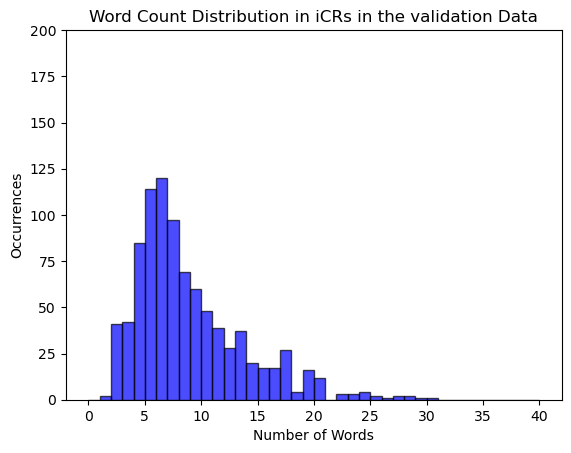

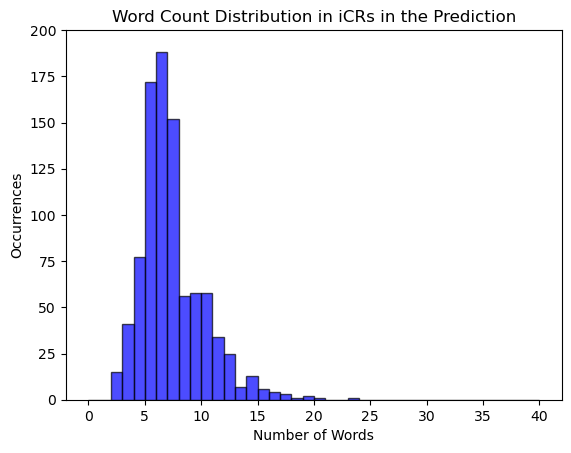

In [25]:
def plot_token_distribution(string_list, source="Prediction"):
    tokenized_strings = [text.split() for text in string_list]
    token_counts = [len(tokens) for tokens in tokenized_strings]

    plt.hist(token_counts, bins=range(41), alpha=0.7, color='blue', edgecolor='black')
    plt.ylim(top=200)
    plt.title(f'Word Count Distribution in iCRs in {source}')
    plt.xlabel('Number of Words')
    plt.ylabel('Occurrences')
    plt.show()

plot_token_distribution(targets, "the validation Data")
plot_token_distribution(predictions, "the Prediction")

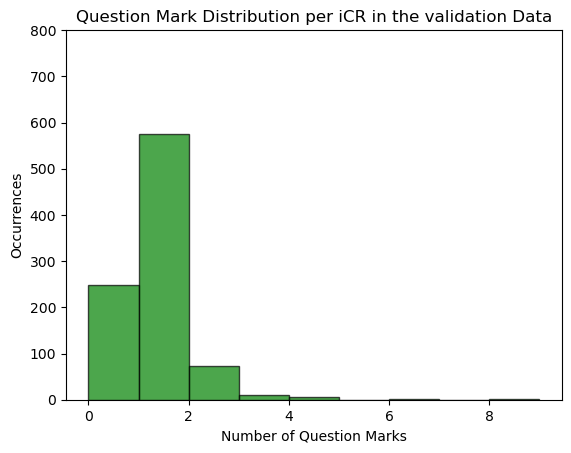

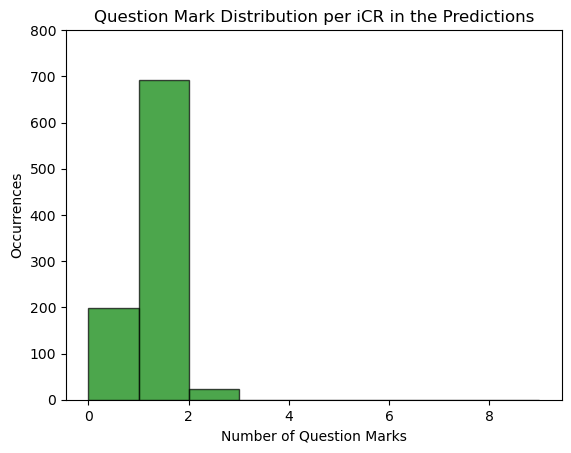

In [28]:
def plot_question_mark_distribution(string_list, titel= "Prediction"):
    # Count the number of question marks in each string
    question_mark_counts = [text.count('?') for text in string_list]

    plt.hist(question_mark_counts, bins=range(10), alpha=0.7, color='green', edgecolor='black')
    plt.ylim(top=800)
    plt.title(f'Question Mark Distribution per iCR in the {titel}')
    plt.xlabel('Number of Question Marks')
    plt.ylabel('Occurrences')

    plt.show()

plot_question_mark_distribution(targets, "validation Data")
plot_question_mark_distribution(predictions, "Predictions")

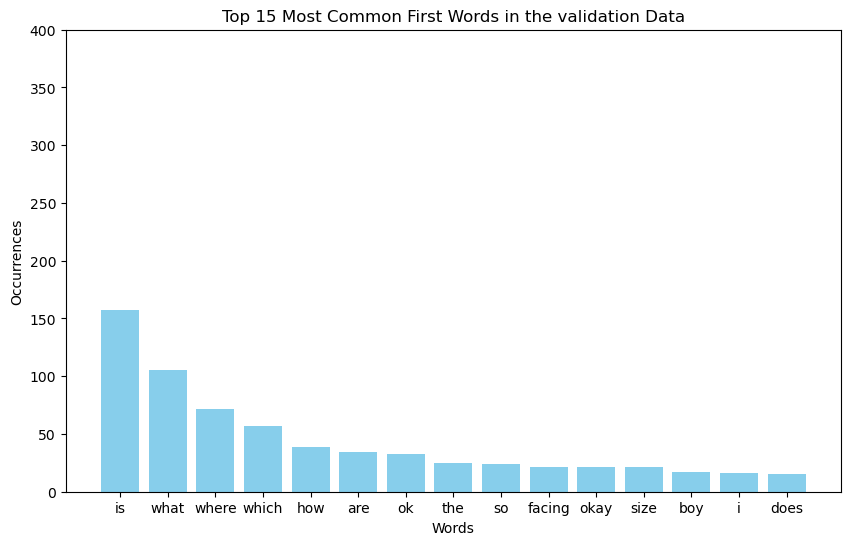

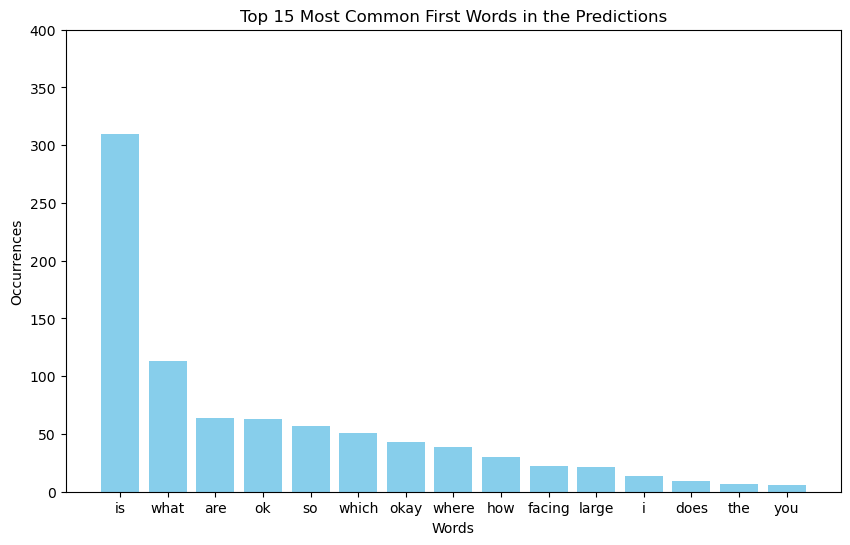

In [43]:
def plot_most_common_words(string_list, titel=" ", num_words=15):
    words = [string.split()[0] for string in string_list]
    word_counts = Counter(words)

    most_common_words = word_counts.most_common(num_words)
    words, counts = zip(*most_common_words)

    plt.figure(figsize=(10, 6))
    plt.bar(words, counts, color='skyblue')
    plt.ylim(top=400)
    plt.xlabel('Words')
    plt.ylabel('Occurrences')
    plt.title(f'Top {num_words} Most Common First Words {titel}')
    plt.show()

plot_most_common_words(targets, "in the validation Data")
plot_most_common_words(predictions, "in the Predictions")


In [103]:
def count_unique_starts(string_list, n = 2):
    first_words = [text.split()[0] if text else 'No words' for text in string_list]

    word_counts = Counter(first_words)
    frequent_words = {word for word, count in word_counts.items() if count >= n}
    return len(frequent_words)


for n in range(3):
    n +=1
    t = count_unique_starts(targets, n)
    p = count_unique_starts(predictions, n)

    print(f"\nNumber of Unique iCR Starts (at least {n} occurrences):\n")
    print(f"Targets:     {t} unique first words")
    print(f"Predictions: {p} unique first words")



Number of Unique iCR Starts (at least 1 occurrences):

Targets:     143 unique first words
Predictions: 50 unique first words

Number of Unique iCR Starts (at least 2 occurrences):

Targets:     68 unique first words
Predictions: 32 unique first words

Number of Unique iCR Starts (at least 3 occurrences):

Targets:     40 unique first words
Predictions: 25 unique first words


In [58]:
def count_category_occurrences(sentences, words, n=1, y=255, lr = False, category = "Object", where="Sentences"):
    all_sentences = ' '.join(sentences)
    if lr:
        all_sentences = all_sentences.replace("left or right", "left_or_right")
        all_sentences = all_sentences.replace("right or left", "right_or_left")
    all_words = all_sentences.split()
    word_counts = Counter(all_words)

    word_occurrences = {word: count for word, count in word_counts.items() if word in words and count >= n}
    sorted_word_occurrences = dict(sorted(word_occurrences.items(), key=lambda item: item[1], reverse=True))

    plt.bar(sorted_word_occurrences.keys(), sorted_word_occurrences.values(), color='purple')
    plt.xlabel('Words')
    plt.ylabel('Occurrences')
    plt.title(f'~{category} Occurrences in {where}')
    plt.xticks(rotation='vertical')
    plt.ylim(0, y)
    plt.show()
    return 

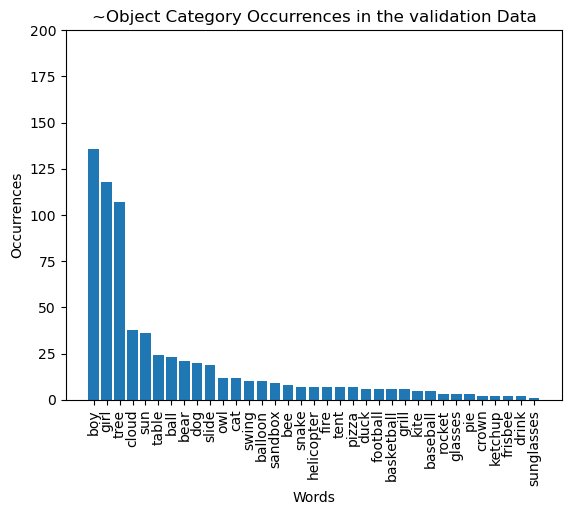

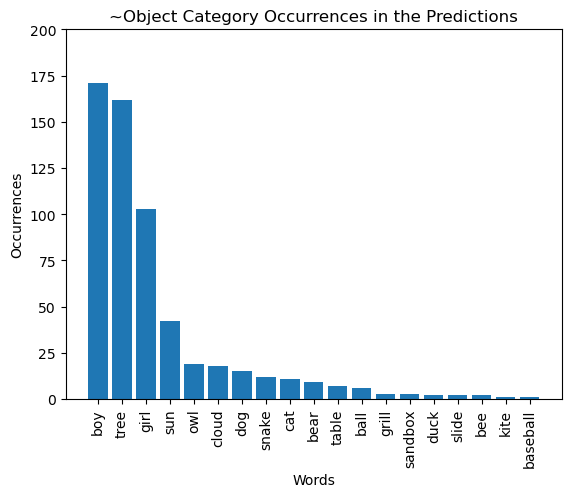

In [50]:
df = pd.read_csv('../data/codraw-icr-v2.tsv', delimiter='\t')
categories = set(df[['clipart_1', 'clipart_2', 'clipart_3', 'clipart_4', 'clipart_5']].values.flatten())
categories_list = [str(category).replace('_', ' ') for category in categories]

count_category_occurrences(targets, categories_list, y=200, category="Object", where="the validation Data")
count_category_occurrences(predictions, categories_list, y=200, category="Object", where="the Predictions")


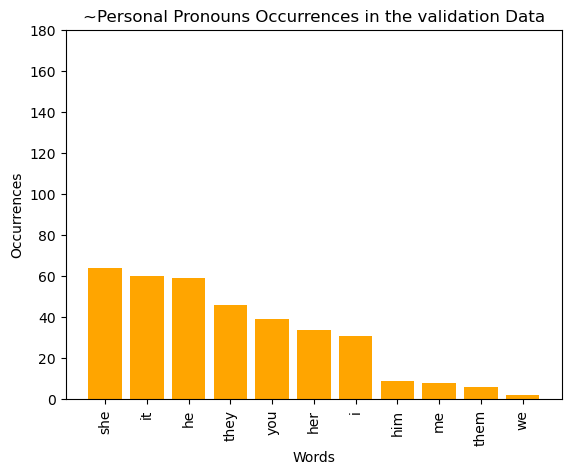

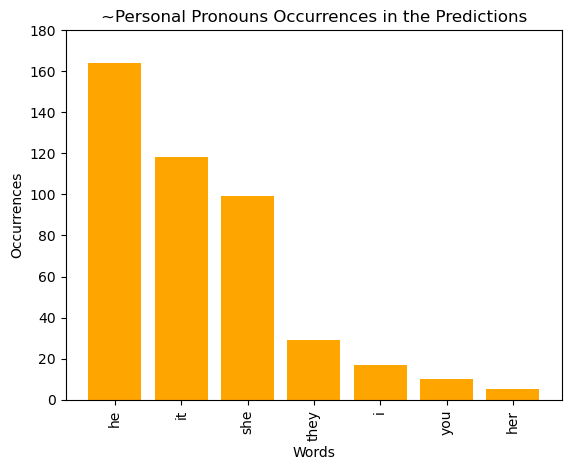

In [57]:
personal_pronouns = ['i', 'you', 'he', 'she', 'it', 'we', 'they', 'me', 'you', 'him', 'her', 'us', 'them', 'myself', 'yourself', 
                     'ourselves', 'yourselves', 'themselves']
count_category_occurrences(targets, personal_pronouns, y=180, category="Personal Pronouns", where="the validation Data")
count_category_occurrences(predictions, personal_pronouns, y=180, category="Personal Pronouns", where="the Predictions")

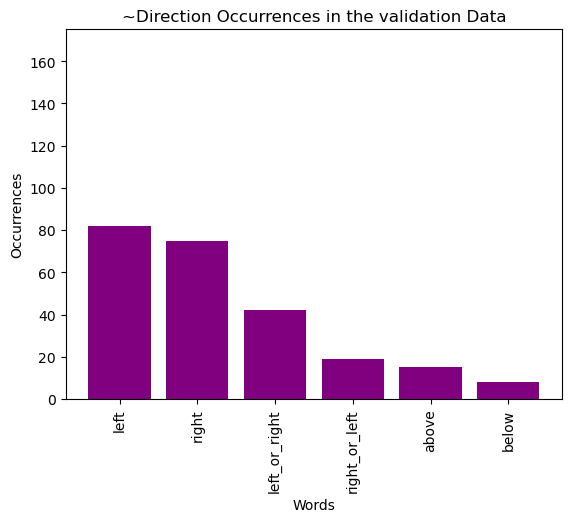

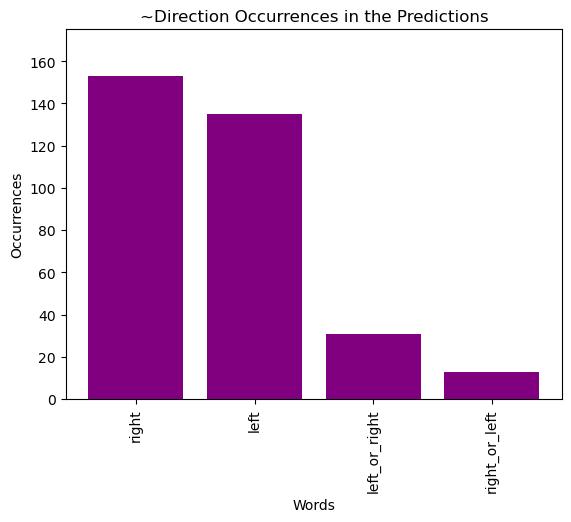

In [61]:
directions = ["left", "right", "above", "below", "left_or_right", "right_or_left"]
count_category_occurrences(targets, directions, y=175, lr=True, category="Direction", where="the validation Data")
count_category_occurrences(predictions, directions, y=175, lr=True, category="Direction", where="the Predictions")

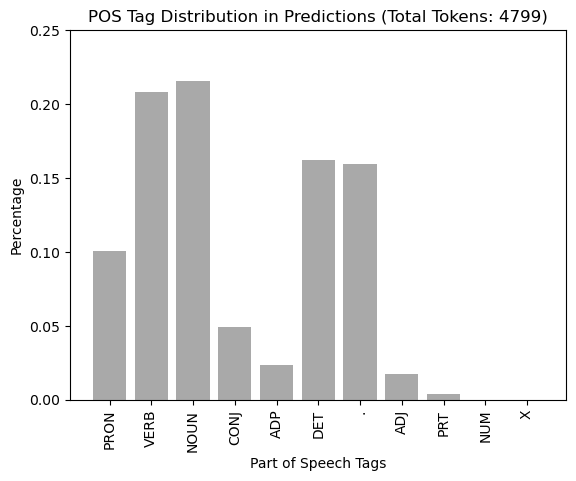

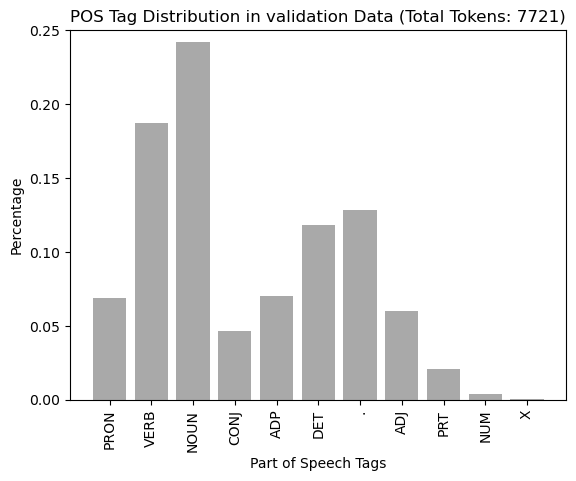

In [64]:
def count_pos_distribution(sentences, source=""):
    pos_order = ['PRON', 'VERB', 'NOUN', 'CONJ', 'ADP', 'DET', '.', 'ADJ', 'PRT', 'NUM', 'X']
    pos_counts = Counter()
    total_tokens = 0
    for sentence in sentences:
        words = word_tokenize(sentence)
        total_tokens += len(words)
        tagged_words = pos_tag(words, tagset="universal")
        # Update POS tag counts
        pos_counts.update(pos for word, pos in tagged_words)
    # Normalize the counts to show the distribution
    pos_distribution = {pos: pos_counts[pos] / total_tokens for pos in pos_order}

    plt.bar(pos_distribution.keys(), pos_distribution.values(), color='darkgrey')
    plt.ylim(0, 0.25)
    plt.xlabel('Part of Speech Tags')
    plt.ylabel('Percentage')
    plt.title(f'POS Tag Distribution in {source} (Total Tokens: {total_tokens})')
    plt.xticks(rotation='vertical')
    plt.show()

count_pos_distribution(predictions, source="Predictions")
count_pos_distribution(targets, source="validation Data")


## Data Area Analysis

In [148]:
df = pd.read_csv('../data/codraw-icr-v2.tsv', delimiter='\t')
val_df = df[df['game_name'].str.startswith('val', na=False)]
val_df['game_id'] = val_df['game_name'].str.extract(r'_0*([1-9][0-9]*)')
val_df['turn'] = val_df['turn'].astype(str)
val_df.head()

,Unnamed: 0,teller_before,drawer,teller_after,is_CR_annotator_1,do_annotators_agree,is_CR_annotator_2,mood,is_source_utterance_last_turn,next_turn_contains_response,clipart,clipart_1,clipart_2,clipart_3,clipart_4,clipart_5,position,size,direction,relation_to_other_cliparts,disambig_object,disambig_person,game_name,turn,annotation_round,freq,game_id
7,8,next on the left of the dog is a sandbox,does the sandbox go down to the bottom or wher...,the tree is in back of the sandbox . a cat in ...,1,1,1,"polar question,wh-question",1,0,two,sandbox,background,NaN,NaN,NaN,1,0,0,1,0,0,val_09368,3,all types,1.0,9368
33,61,make tree bigger,put it medium size now . is it ok ?,make picnic table bigger and in the center,0,0,1,"declarative,polar question",1,0,one,tree_group,NaN,NaN,NaN,NaN,0,1,0,0,0,0,val_07918,11,all types,1.0,7918
34,65,yes,"is the left side of the girl 's leg , on your ...",edge,0,0,1,polar question,0,1,two,girl,table,NaN,NaN,NaN,0,0,0,1,0,0,val_06878,13,all types,1.0,6878
49,91,girl sitting on the left white blue pointy hat...,girl is directly under helicopter ?,"heli facing right , guy across the girl sittin...",1,1,1,polar question,1,0,two,girl,helicopter,NaN,NaN,NaN,0,0,0,1,0,0,val_09678,1,all types,1.0,9678
71,141,yes,med ?,there is a shocked boy sitting at the end of t...,0,0,1,other,0,0,unknown,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,val_08028,3,all types,1.0,8028


In [149]:
with open("./outputs/val_games.txt") as file:
    games = [line.strip() for line in file.readlines()]
    
with open("./outputs/val_turns.txt") as file:
    turns = [line.strip() for line in file.readlines()]
    
output_df = pd.DataFrame({'game_id': games, 'turn': turns})
output_df

,game_id,turn
0,2468,3
1,2468,4
2,2468,5
3,5868,1
4,9368,1
...,...,...
909,7698,2
910,6928,2
911,6928,3
912,6928,5


In [150]:
merged_df = pd.merge(output_df, val_df, on=['game_id', 'turn'])

columns_to_keep = ['game_id', 'turn', 'teller_before', "drawer", 'clipart_1', 'clipart_2', 'clipart_3', 'clipart_4',
       'clipart_5', "position", "size", "direction", "relation_to_other_cliparts", "disambig_object", "disambig_person","mood",
                  "clipart"]
final_df = merged_df[columns_to_keep]
final_df

,game_id,turn,teller_before,drawer,clipart_1,clipart_2,clipart_3,clipart_4,clipart_5,position,size,direction,relation_to_other_cliparts,disambig_object,disambig_person,mood,clipart
0,2468,3,right side of picture is rocket flames just ba...,you mean rocket is left or behind the tree ?,rocket,tree_group,NaN,NaN,NaN,1,0,0,1,0,0,alternative question,two
1,2468,4,about inch half up from grass but can see whol...,but where is it ? left edge or behind the tree ?,rocket,tree_group,NaN,NaN,NaN,1,0,0,1,0,0,"alternative question,wh-question",two
2,2468,5,rocket is far right of picture in sky,so tree is right too you said ?,tree_group,NaN,NaN,NaN,NaN,1,0,0,0,0,0,polar question,one
3,5868,1,big pine tree on the left with a boy sitting i...,what hat,hat_group,NaN,NaN,NaN,NaN,0,0,0,0,1,0,wh-question,one
4,9368,1,there is a park with a dog .,where is the dog located ?,dog,NaN,NaN,NaN,NaN,1,0,0,0,0,0,wh-question,one
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,7698,2,on the right is a medium boy facing the right ...,on right of girl ?,boy,girl,NaN,NaN,NaN,0,0,0,1,1,0,polar question,two
910,6928,2,there is a small helicopter to the right of th...,facing where ? size ?,helicopter,girl,NaN,NaN,NaN,0,1,1,0,0,0,"wh-question,other",two
911,6928,3,"she is facing left , she is i guess big , her ...","size , direction facing for helicopter and duck ?",girl,helicopter,duck,NaN,NaN,0,1,1,0,0,0,other,many
912,6928,5,there is a big boy with a hat in front of the ...,is he large ?,boy,NaN,NaN,NaN,NaN,0,1,0,0,0,0,polar question,one


In [151]:
final_df["predictions"] = predictions
final_df["targets"] = targets

In [152]:
target_strings = ['girl', 'boy', 'tree_group']

mask = final_df[['clipart_1', 'clipart_2', 'clipart_3', 'clipart_4', 'clipart_5']].apply(
    lambda row: any(target in str(row) for target in target_strings),
    axis=1
)
girlboytree_df = final_df[mask]
len(girlboytree_df)

543

In [153]:
whatwhichhowfacing_df = final_df[final_df['targets'].str.startswith(('what', 'which', 'how', 'facing'))]
len(whatwhichhowfacing_df)

222

In [154]:
hesheit_df = final_df[final_df['targets'].str.contains(r'\b(he|she|it)\b', case=False, regex=True)]
len(hesheit_df)

168

In [155]:
leftright_df = final_df[final_df['targets'].str.contains(r'\b(left|right)\b', case=False, regex=True)]
len(leftright_df)

184

In [156]:
lrrl_df = final_df[final_df['targets'].str.contains(r'\b(left or right|right or left)\b', case=False, regex=True)]
len(lrrl_df)

58

In [157]:
scores = evaluator.evaluate(final_df["predictions"].tolist(), final_df["targets"].tolist())

print ("{:<20} {:<15}".format('Metric','Score'))
print("----------------------------")
for k, v in scores.items():
    score = v
    print ("{:<20} {:<15}".format(k, score))

scores_gbt = evaluator.evaluate(girlboytree_df["predictions"].tolist(), girlboytree_df["targets"].tolist())

print ("{:<20} {:<15}".format('Metric','Score'))
print("----------------------------")
for k, v in scores_gbt.items():
    score = v
    print ("{:<20} {:<15}".format(k, score))

scores_wwhf = evaluator.evaluate(whatwhichhowfacing_df["predictions"].tolist(), whatwhichhowfacing_df["targets"].tolist())

print ("{:<20} {:<15}".format('Metric','Score'))
print("----------------------------")
for k, v in scores_wwhf.items():
    score = v
    print ("{:<20} {:<15}".format(k, score))

scores_hsi = evaluator.evaluate(hesheit_df["predictions"].tolist(), hesheit_df["targets"].tolist())

print ("{:<20} {:<15}".format('Metric','Score'))
print("----------------------------")
for k, v in scores_hsi.items():
    score = v
    print ("{:<20} {:<15}".format(k, score))

scores_lr = evaluator.evaluate(leftright_df["predictions"].tolist(), leftright_df["targets"].tolist())

print ("{:<20} {:<15}".format('Metric','Score'))
print("----------------------------")
for k, v in scores_lr.items():
    score = v
    print ("{:<20} {:<15}".format(k, score))

scores_b = evaluator.evaluate(lrrl_df["predictions"].tolist(), below_df["targets"].tolist())

print ("{:<20} {:<15}".format('Metric','Score'))
print("----------------------------")
for k, v in scores_b.items():
    score = v
    print ("{:<20} {:<15}".format(k, score))


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Metric               Score          
----------------------------
BERT Score           0.1955         
ChrF Score           0.1096         
BLEU Score1          0.146          
BLEU Score2          0.0308         
BLEU Score3          0.0051         
BLEU Score4          0.0            
ROUGE Score F1       0.1523         
CIDEr Score          0.14           
METEOR Score         0.125          
Distinct-1 Score     0.9574         
Distinct-2 Score     0.7458         


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Metric               Score          
----------------------------
BERT Score           0.2065         
ChrF Score           0.111          
BLEU Score1          0.1422         
BLEU Score2          0.0305         
BLEU Score3          0.0053         
BLEU Score4          0.0            
ROUGE Score F1       0.1574         
CIDEr Score          0.1531         
METEOR Score         0.1242         
Distinct-1 Score     0.9547         
Distinct-2 Score     0.7452         


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Metric               Score          
----------------------------
BERT Score           0.2641         
ChrF Score           0.1344         
BLEU Score1          0.1759         
BLEU Score2          0.0446         
BLEU Score3          0.0081         
BLEU Score4          0.0            
ROUGE Score F1       0.1821         
CIDEr Score          0.177          
METEOR Score         0.1525         
Distinct-1 Score     0.9484         
Distinct-2 Score     0.7412         


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Metric               Score          
----------------------------
BERT Score           0.215          
ChrF Score           0.103          
BLEU Score1          0.1464         
BLEU Score2          0.0257         
BLEU Score3          0.0044         
BLEU Score4          0.0            
ROUGE Score F1       0.1817         
CIDEr Score          0.1092         
METEOR Score         0.1274         
Distinct-1 Score     0.9668         
Distinct-2 Score     0.7434         


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Metric               Score          
----------------------------
BERT Score           0.1702         
ChrF Score           0.1106         
BLEU Score1          0.1393         
BLEU Score2          0.032          
BLEU Score3          0.0081         
BLEU Score4          0.0            
ROUGE Score F1       0.1672         
CIDEr Score          0.1482         
METEOR Score         0.121          
Distinct-1 Score     0.968          
Distinct-2 Score     0.7504         


NameError: name 'below_df' is not defined

In [136]:
print("\\begin{tabular}{lcccccc}")
print("\\toprule")
print("                     & all        & gbt        & wwhf       & hsi        & lr         & lrrl      \\\\")
print("\midrule")
for k, v in scores.items():
    score = v
    print("{:<20} & {: <10.4f} & {: <10.4f} & {: <10.4f} & {: <10.4f} & {: <10.4f} & {: <10.4f} \\\\".format(k, score, scores_gbt[k], scores_wwhf[k], scores_hsi[k], scores_lr[k], scores_b[k]))
print("\\bottomrule")
print("\end{tabular}")

\begin{tabular}{lcccccc}
\toprule
                     & all        & gbt        & wwhf       & hsi        & lr         & below      \\
\midrule
BERT Score           & 0.1420     & 0.1369     & 0.1403     & 0.1435     & 0.1511     & 0.2137     \\
ChrF Score           & 0.1527     & 0.1508     & 0.1578     & 0.1473     & 0.1438     & 0.1205     \\
BLEU Score1          & 0.1096     & 0.1098     & 0.1197     & 0.1203     & 0.1045     & 0.1164     \\
BLEU Score2          & 0.0243     & 0.0246     & 0.0232     & 0.0321     & 0.0272     & 0.0200     \\
BLEU Score3          & 0.0042     & 0.0030     & 0.0045     & 0.0026     & 0.0046     & 0.0000     \\
BLEU Score4          & 0.0009     & 0.0005     & 0.0000     & 0.0000     & 0.0032     & 0.0000     \\
ROUGE Score F1       & 0.1230     & 0.1230     & 0.1371     & 0.1367     & 0.1282     & 0.1181     \\
CIDEr Score          & 0.1044     & 0.0979     & 0.1018     & 0.0968     & 0.1178     & 0.1188     \\
METEOR Score         & 0.1168     & 0.1

## Context Usage Analysis

In [11]:
# Function to map indices to class names
def map_indices_to_class_names(binary_predictions, mapping):
    class_name_predictions = []
    for row in binary_predictions:
        indices = row.nonzero(as_tuple=True)[0]
        class_names = [mapping[idx.item()] for idx in indices]
        class_name_predictions.append(class_names)
    return class_name_predictions

In [8]:
threshold = 0

clipart_mapping = { 0: 'cloud',
                    1: 'helicopter',
                    2: 'balloon',
                    3: 'tree',
                    4: 'table',
                    5: 'grill',
                    6: 'tent',
                    7: 'boy smile arms_right',
                    8: 'boy scared leg_crossed',
                    9: 'boy sad wave',
                    10: 'boy wide_smile wave',
                    11: 'boy wide_smile arms_right',
                    12: 'girl sad leg_crossed',
                    13: 'girl smile wave',
                    14: 'girl smile sit',
                    15: 'girl angry arms_up',
                    16: 'girl smile leg_crossed',
                    17: 'snake',
                    18: 'bear',
                    19: 'sunglasses',
                    20: 'blue hat star',
                    21: 'rainbow hat helix',
                    22: 'pizza',
                    23: 'mustard',
                    24: 'air balloons',
                    25: 'kite',
                    26: 'football',
                    27: 'baseball bat'}

number_mapping = {
    0: "nan",
    1: "two",
    2: "many",
    3: "one",
    4: "unknown"}

topic_mapping = {
    0: "position",
    1: "size",
    2: "direction",
    3: "relation_to_other_cliparts",
    4: "disambig_object",
    5: "disambig_person",
}

mood_mapping = {
    0: "nan",
    1: "alternative_question",
    2: "declarative",
    3: "imperative",
    4: "other",
    5: "polar_question",
    6: "wh_question",
}

In [55]:
file_path = 'outputs/1number_predictions.txt'

with open(file_path, 'r') as file:
    loaded_all_lists = json.load(file)

predictions = torch.tensor(loaded_all_lists).squeeze(1)
max_indices = predictions.argmax(dim=1)

number_categories = [number_mapping[idx.item()] for idx in max_indices]
final_df["predictions_number"] = number_categories

In [56]:
file_path = 'outputs/1topic_predictions.txt'
with open(file_path, 'r') as file:
    loaded_all_lists = json.load(file)

output_tensor = torch.tensor(loaded_all_lists).squeeze(1)
binary_predictions = (output_tensor > threshold).int()

for i, row in enumerate(binary_predictions):
    if row.sum() == 0:
        index_of_largest = torch.argmax(output_tensor[i])
        binary_predictions[i][index_of_largest] = 1


topic_predictions = map_indices_to_class_names(binary_predictions, topic_mapping)

final_df["predictions_topic"] = topic_predictions

In [57]:
file_path = 'outputs/1mood_predictions.txt'

with open(file_path, 'r') as file:
    loaded_all_lists = json.load(file)

output_tensor = torch.tensor(loaded_all_lists).squeeze(1)
binary_predictions = (output_tensor > threshold).int()

for i, row in enumerate(binary_predictions):
    if row.sum() == 0:
        index_of_largest = torch.argmax(output_tensor[i])
        binary_predictions[i][index_of_largest] = 1


mood_predictions = map_indices_to_class_names(binary_predictions, mood_mapping)

final_df["predictions_mood"] = mood_predictions


In [58]:
file_path = 'outputs/1clipart_predictions.txt'

with open(file_path, 'r') as file:
    loaded_all_lists = json.load(file)

output_tensor = torch.tensor(loaded_all_lists).squeeze(1)
binary_predictions = (output_tensor > threshold).int()

for i, row in enumerate(binary_predictions):
    if row.sum() == 0:
        index_of_largest = torch.argmax(output_tensor[i])
        binary_predictions[i][index_of_largest] = 1


clipart_predictions = map_indices_to_class_names(binary_predictions, clipart_mapping)

final_df["predictions_clipart"] = clipart_predictions

In [64]:
pd.set_option('display.max_columns', 30) 
pd.set_option('display.max_rows', 200) 

In [65]:
final_df.head(200)

,game_id,turn,teller_before,drawer,clipart_1,clipart_2,clipart_3,clipart_4,clipart_5,position,size,direction,relation_to_other_cliparts,disambig_object,disambig_person,mood,clipart,predictions,targets,predictions_number,predictions_topic,predictions_mood,predictions_clipart
0,2468,3,right side of picture is rocket flames just ba...,you mean rocket is left or behind the tree ?,rocket,tree_group,NaN,NaN,NaN,1,0,0,1,0,0,alternative question,two,which direction is the boy facing,you mean rocket is left or behind the tree ?,one,"[position, size]",[polar_question],[snake]
1,2468,4,about inch half up from grass but can see whol...,but where is it ? left edge or behind the tree ?,rocket,tree_group,NaN,NaN,NaN,1,0,0,1,0,0,"alternative question,wh-question",two,what direction ?,but where is it ? left edge or behind the tree ?,one,[size],[polar_question],[tent]
2,2468,5,rocket is far right of picture in sky,so tree is right too you said ?,tree_group,NaN,NaN,NaN,NaN,1,0,0,0,0,0,polar question,one,what direction is the girl ?,so tree is right too you said ?,two,[direction],[polar_question],[bear]
3,5868,1,big pine tree on the left with a boy sitting i...,what hat,hat_group,NaN,NaN,NaN,NaN,0,0,0,0,1,0,wh-question,one,which side is it ?,what hat,one,[disambig_person],"[alternative_question, polar_question]","[boy smile arms_right, boy scared leg_crossed,..."
4,9368,1,there is a park with a dog .,where is the dog located ?,dog,NaN,NaN,NaN,NaN,1,0,0,0,0,0,wh-question,one,what direction is the tree ?,where is the dog located ?,one,[position],[alternative_question],[tent]
5,9368,3,next on the left of the dog is a sandbox,does the sandbox go down to the bottom or wher...,sandbox,background,NaN,NaN,NaN,1,0,0,1,0,0,"polar question,wh-question",two,which side ?,does the sandbox go down to the bottom or wher...,one,[direction],[wh_question],[air balloons]
6,9368,5,to the right of the dog is a sliding board and...,what direction is the slide facing ?,slide,NaN,NaN,NaN,NaN,0,0,1,0,0,0,wh-question,one,what is the right ?,what direction is the slide facing ?,one,[size],[polar_question],"[table, snake]"
7,9368,6,in the sky there is a thunderbolt looming unde...,where in the sky is the cloud and thunder bolt ?,background,cloud_lightning,NaN,NaN,NaN,0,0,0,1,0,0,wh-question,two,is the tree ?,where in the sky is the cloud and thunder bolt ?,one,[direction],[polar_question],[bear]
8,9368,7,left,what about the cloud and thunderbolt ?,cloud_lightning,NaN,NaN,NaN,NaN,1,0,0,0,0,0,wh-question,one,where is the boy is the boy facing ?,what about the cloud and thunderbolt ?,one,[position],[wh_question],[boy sad wave]
9,5168,0,large sandbox on the left in the middle,is it cut off ?,sandbox,NaN,NaN,NaN,NaN,1,0,0,0,0,0,polar question,one,what side,is it cut off ?,one,[direction],[wh_question],[tent]
